In [1]:
import pandas as pd
import numpy as np
import folium
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MultipleLocator, AutoLocator, MaxNLocator, IndexLocator

In [2]:
scooter_june_pride = pd.read_csv('../data/small_scooter.csv')
scooter_june_pride.drop(columns='Unnamed: 0', inplace=True)
scooter_june_pride['Start_Time'] = pd.to_datetime(scooter_june_pride['Start_Time'])
scooter_june_pride['End_Time'] = pd.to_datetime(scooter_june_pride['End_Time'])

In [3]:
scooter_june_pride.head()

Trip_ID          Start_Time  \
0  11d42b99-e839-346c-11d4-2b99e839346c 2019-06-24 19:00:00   
1  c46c5b1f-d7a1-5c11-96b6-bb8bfa2d4fa3 2019-06-21 18:00:00   
2  3ad30b66-b615-404b-ada2-92cfb30dd32b 2019-06-21 21:00:00   
3  8574e87e-d881-4468-bf79-f7e62f268f4d 2019-06-21 18:00:00   
4  9b79b345-1492-40f4-85a6-fee83c5a6ffc 2019-06-26 18:00:00   

             End_Time  Trip_Distance  Trip_Duration  Accuracy  \
0 2019-06-24 19:00:00       0.569919       5.983333        10   
1 2019-06-21 19:00:00       0.469857      46.833333         0   
2 2019-06-21 21:00:00       0.824736       4.000000       152   
3 2019-06-21 19:00:00       1.694842      22.416667        10   
4 2019-06-26 18:00:00       0.991920       5.316667       152   

   Start_Centroid_Latitude  Start_Centroid_Longitude  End_Centroid_Latitude  \
0                41.894101                -87.763112              41.894101   
1                41.953582                -87.723452              41.953582   
2                41.953582                -87.723452              41.953582   
3                41.953582                -87.723452              41.953582   
4                41.953582                -87.723452              41.953582   

   End_Centroid_Longitude  
0              -87.763112  
1              -87.723452  
2              -87.723452  
3              -87.723452  
4              -87.723452

In [4]:
scooter_june_pride.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56918 entries, 0 to 56917
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Trip_ID                   56918 non-null  object        
 1   Start_Time                56918 non-null  datetime64[ns]
 2   End_Time                  56918 non-null  datetime64[ns]
 3   Trip_Distance             56918 non-null  float64       
 4   Trip_Duration             56918 non-null  float64       
 5   Accuracy                  56918 non-null  int64         
 6   Start_Centroid_Latitude   56918 non-null  float64       
 7   Start_Centroid_Longitude  56918 non-null  float64       
 8   End_Centroid_Latitude     56918 non-null  float64       
 9   End_Centroid_Longitude    56918 non-null  float64       
dtypes: datetime64[ns](2), float64(6), int64(1), object(1)
memory usage: 4.3+ MB


In [5]:
scooter_june_pride.describe()

Trip_Distance  Trip_Duration      Accuracy  Start_Centroid_Latitude  \
count   56918.000000   56918.000000  56918.000000             56918.000000   
mean        1.584600      16.484496     48.557434                41.900535   
std         1.619246      18.982077     65.181966                 0.023784   
min         0.000622       2.016667      0.000000                41.830065   
25%         0.522063       5.733333     10.000000                41.885288   
50%         1.064015      10.550000     10.000000                41.901207   
75%         2.077688      19.950000    152.000000                41.921021   
max        22.573648     407.250000    152.000000                41.957366   

       Start_Centroid_Longitude  End_Centroid_Latitude  End_Centroid_Longitude  
count              56918.000000           56918.000000            56918.000000  
mean                 -87.689674              41.900864              -87.689801  
std                    0.034806               0.024219                0.035005  
min                  -87.806020              41.808916              -87.806020  
25%                  -87.711211              41.885288              -87.711211  
50%                  -87.676357              41.901207              -87.676357  
75%                  -87.659848              41.921083              -87.661891  
max                  -87.633309              42.001572              -87.596184

In [6]:
def hist_chart(df, col, ax, title, color, alpha):
    df[col].hist(color=color, grid=False, alpha=alpha, bins=30)
    ax.set_ylabel('Frequency', fontsize=16)
    ax.set_title(title, fontsize=20)
    ax.tick_params(axis='x', which='minor', length=7, width=1)
    ax.tick_params(axis='x', which='major', length=10, width=1, labelsize='medium')
    ax.tick_params(axis='y', which='minor', length=5, width=1)
    ax.tick_params(axis='y', which='major', length=7, width=1, labelsize='medium')
    

(0.0, 10.0)

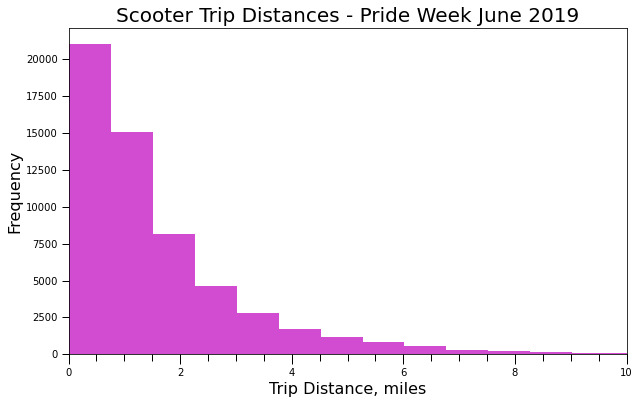

In [7]:
fig, ax = plt.subplots(figsize=(10,6))
hist_chart(scooter_june_pride, 'Trip_Distance', ax, 'Scooter Trip Distances - Pride Week June 2019', 'm', alpha=0.7)
ax.set_xlabel('Trip Distance, miles', fontsize=16)
ax.xaxis.set_minor_locator(MultipleLocator(0.5))
ax.yaxis.set_minor_locator(MultipleLocator(5000))
ax.set_xlim(0, 10)

(0.0, 150.0)

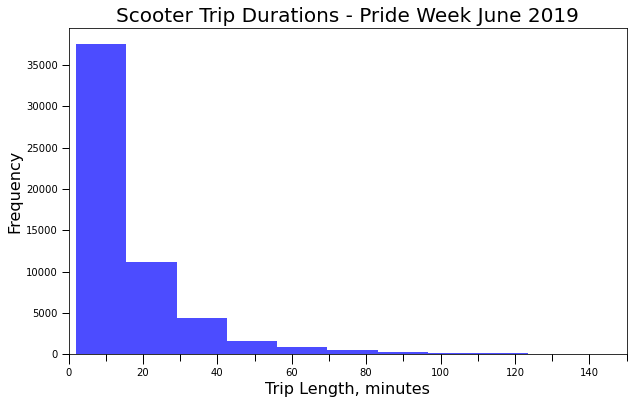

In [8]:
fig, ax = plt.subplots(figsize=(10,6))
hist_chart(scooter_june_pride, 'Trip_Duration', ax, 'Scooter Trip Durations - Pride Week June 2019', 'b', alpha=0.7)
ax.set_xlabel('Trip Length, minutes', fontsize=16)
ax.xaxis.set_minor_locator(MultipleLocator(10))
ax.yaxis.set_minor_locator(MultipleLocator(5000))
ax.set_xlim(0,150)

In [9]:
start_locations = scooter_june_pride[['Start_Centroid_Latitude', 'Start_Centroid_Longitude']]
scooter_june_pride['Start_Location'] = start_locations.values.tolist()
end_locations = scooter_june_pride[['Start_Centroid_Latitude', 'Start_Centroid_Longitude']]
scooter_june_pride['Start_Location'] = end_locations.values.tolist()
# scooter_june_pride['End_Location'] = list(scooter_june_pride['End_Centroid_Latitude', 'End_Centroid_Longitude'])

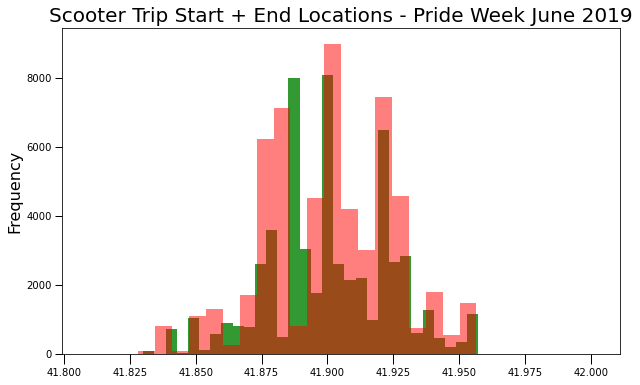

In [10]:
fig, ax = plt.subplots(figsize=(10,6))
hist_chart(scooter_june_pride, 'Start_Centroid_Latitude', ax, 
           'Scooter Trip Start + End Locations - Pride Week June 2019', 'g', alpha=0.8)
hist_chart(scooter_june_pride, 'End_Centroid_Latitude', ax, 
           'Scooter Trip Start + End Locations - Pride Week June 2019', 'r', alpha=0.5)


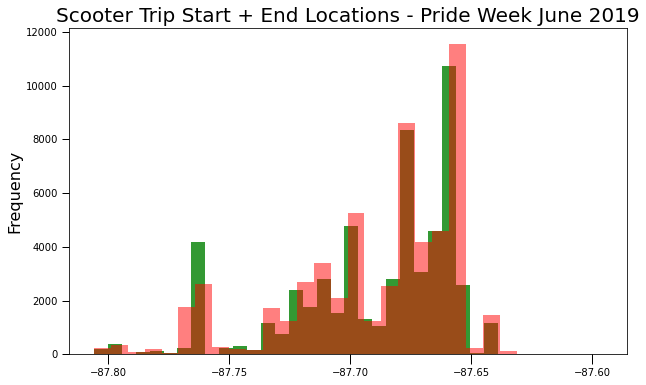

In [11]:
fig, ax = plt.subplots(figsize=(10,6))
hist_chart(scooter_june_pride, 'Start_Centroid_Longitude', ax, 
           'Scooter Trip Start + End Locations - Pride Week June 2019', 'g', alpha=0.8)
hist_chart(scooter_june_pride, 'End_Centroid_Longitude', ax, 
           'Scooter Trip Start + End Locations - Pride Week June 2019', 'r', alpha=0.5)


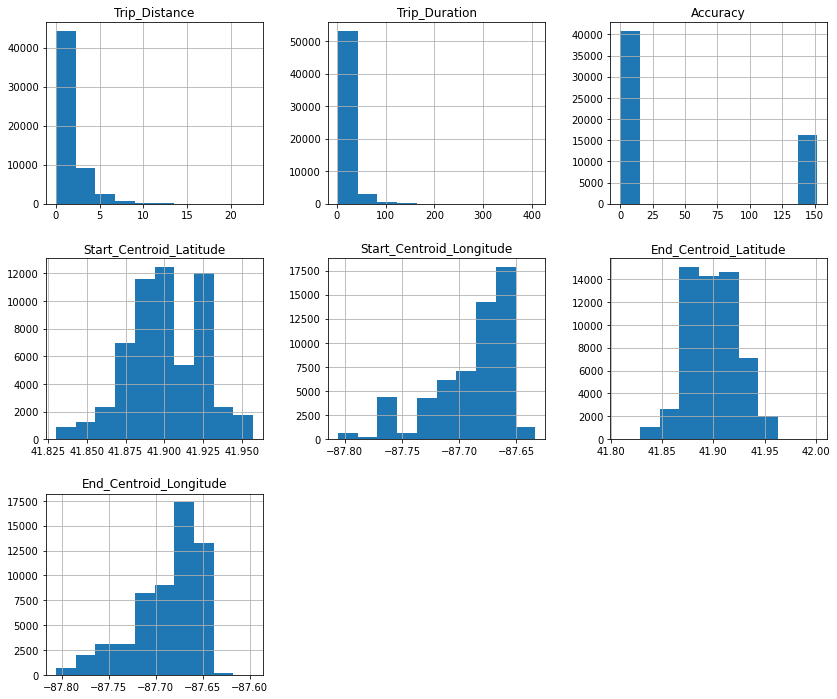

In [12]:
scooter_june_pride.hist(figsize=(14,12))
fig.tight_layout()

In [13]:
from folium.plugins import HeatMap

In [14]:
chicago_map = folium.Map(location=[41.862548, -87.749163], zoom_start=11)

In [15]:
heat_map = folium.FeatureGroup(name = 'heat_map')
heat_map.add_child( HeatMap( list(zip(scooter_june_pride['Start_Centroid_Latitude'].values,
                                      scooter_june_pride['Start_Centroid_Longitude'].values)),
                            name='Start Locations',
                            max_val=float(60),
                   min_opacity=0.2,
                   radius=5.5, blur=3.5, 
                   max_zoom=1, 
                 ))
chicago_map.add_child(heat_map)


In [16]:
heat_map = folium.FeatureGroup(name = 'heat_map')
max_amount = float(60)
heat_map.add_child( HeatMap( list(zip(scooter_june_pride['End_Centroid_Latitude'].values,
                                      scooter_june_pride['End_Centroid_Longitude'].values)), 
                            name='End Locations',
                   min_opacity=0.2,
                   max_val=max_amount,
                   radius=5.5, blur=3.5, 
                   max_zoom=1, 
                 ))
chicago_map.add_child(heat_map)


In [17]:
from datetime import datetime

In [35]:
scooter_june_pride['Day_of_Week'] = scooter_june_pride['Start_Time'].dt.weekday
scooter_june_pride['Time_of_Day'] = scooter_june_pride['Start_Time'].dt.hour
scooter_june_pride.head()

Trip_ID          Start_Time  \
0  11d42b99-e839-346c-11d4-2b99e839346c 2019-06-24 19:00:00   
1  c46c5b1f-d7a1-5c11-96b6-bb8bfa2d4fa3 2019-06-21 18:00:00   
2  3ad30b66-b615-404b-ada2-92cfb30dd32b 2019-06-21 21:00:00   
3  8574e87e-d881-4468-bf79-f7e62f268f4d 2019-06-21 18:00:00   
4  9b79b345-1492-40f4-85a6-fee83c5a6ffc 2019-06-26 18:00:00   

             End_Time  Trip_Distance  Trip_Duration  Accuracy  \
0 2019-06-24 19:00:00       0.569919       5.983333        10   
1 2019-06-21 19:00:00       0.469857      46.833333         0   
2 2019-06-21 21:00:00       0.824736       4.000000       152   
3 2019-06-21 19:00:00       1.694842      22.416667        10   
4 2019-06-26 18:00:00       0.991920       5.316667       152   

   Start_Centroid_Latitude  Start_Centroid_Longitude  End_Centroid_Latitude  \
0                41.894101                -87.763112              41.894101   
1                41.953582                -87.723452              41.953582   
2                41.953582                -87.723452              41.953582   
3                41.953582                -87.723452              41.953582   
4                41.953582                -87.723452              41.953582   

   End_Centroid_Longitude                         Start_Location  Day_of_Week  \
0              -87.763112  [41.8941012961134, -87.7631118242259]            0   
1              -87.723452   [41.95358181896, -87.72345248206659]            4   
2              -87.723452   [41.95358181896, -87.72345248206659]            4   
3              -87.723452   [41.95358181896, -87.72345248206659]            4   
4              -87.723452   [41.95358181896, -87.72345248206659]            2   

   Time_of_Day  
0           19  
1           18  
2           21  
3           18  
4           18

In [74]:
def bar_chart(series, ax, title, color, label_lst):
    series.plot(kind='bar', color=color)
    ax.set_ylabel('Frequency', fontsize=16)
    ax.set_title(title, fontsize=20)
    if label_lst == None:
        plt.xticks(rotation=45, fontsize=12)
    else:
        ax.set_xticklabels(labels=label_lst, rotation=45, fontsize=12)

Text(0.5, 0, 'Day of the Week')

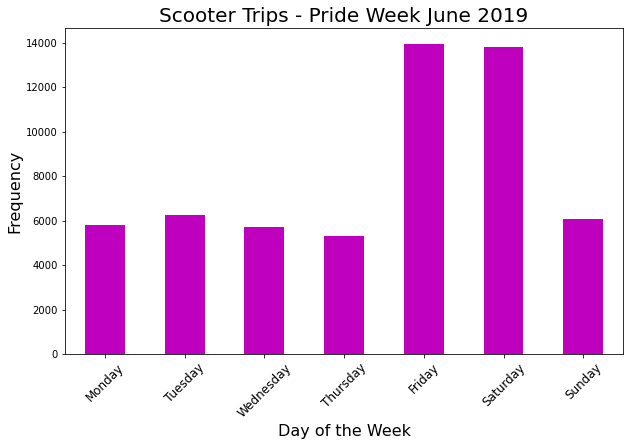

In [75]:
day_counts = scooter_june_pride['Day_of_Week'].value_counts().sort_index()
weekdays=['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday', 'Sunday']

fig, ax = plt.subplots(figsize=(10,6))
bar_chart(day_counts, ax, 'Scooter Trips - Pride Week June 2019', 'm', weekdays)
ax.set_xlabel('Day of the Week', fontsize=16)



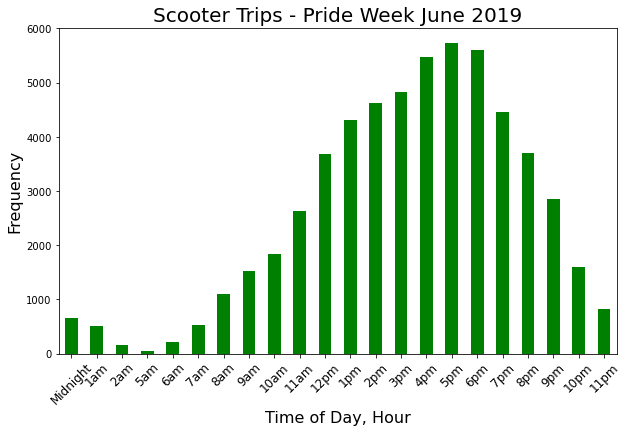

In [76]:
hour_counts = scooter_june_pride['Time_of_Day'].value_counts().sort_index()
hours=['Midnight', '1am', '2am','5am', '6am', '7am', '8am', '9am', '10am', '11am', '12pm',
          '1pm', '2pm', '3pm', '4pm', '5pm', '6pm', '7pm', '8pm', '9pm', '10pm', '11pm',]

fig, ax = plt.subplots(figsize=(10,6))
bar_chart(hour_counts, ax, 'Scooter Trips - Pride Week June 2019', 'g', hours)
ax.set_xlabel('Time of Day, Hour', fontsize=16);



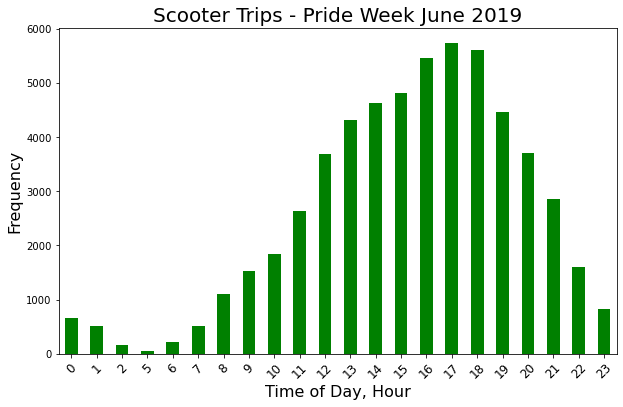

In [77]:
fig, ax = plt.subplots(figsize=(10,6))
bar_chart(hour_counts, ax, 'Scooter Trips - Pride Week June 2019', 'g', label_lst=None)
ax.set_xlabel('Time of Day, Hour', fontsize=16);

In [99]:
hour_day_of_week = scooter_june_pride.groupby(['Day_of_Week', 'Time_of_Day']).count()
hour_day_of_week.head(25)

Trip_ID  Start_Time  End_Time  Trip_Distance  \
Day_of_Week Time_of_Day                                                 
0           0                 58          58        58             58   
            1                 32          32        32             32   
            2                 16          16        16             16   
            5                  3           3         3              3   
            6                 17          17        17             17   
            7                 37          37        37             37   
            8                110         110       110            110   
            9                160         160       160            160   
            10               127         127       127            127   
            11               190         190       190            190   
            12               175         175       175            175   
            13               190         190       190            190   
            14               222         222       222            222   
            15               304         304       304            304   
            16               533         533       533            533   
            17               684         684       684            684   
            18               785         785       785            785   
            19               686         686       686            686   
            20               620         620       620            620   
            21               469         469       469            469   
            22               261         261       261            261   
            23               124         124       124            124   
1           0                 86          86        86             86   
            1                 61          61        61             61   
            2                 18          18        18             18   

                         Trip_Duration  Accuracy  Start_Centroid_Latitude  \
Day_of_Week Time_of_Day                                                     
0           0                       58        58                       58   
            1                       32        32                       32   
            2                       16        16                       16   
            5                        3         3                        3   
            6                       17        17                       17   
            7                       37        37                       37   
            8                      110       110                      110   
            9                      160       160                      160   
            10                     127       127                      127   
            11                     190       190                      190   
            12                     175       175                      175   
            13                     190       190                      190   
            14                     222       222                      222   
            15                     304       304                      304   
            16                     533       533                      533   
            17                     684       684                      684   
            18                     785       785                      785   
            19                     686       686                      686   
            20                     620       620                      620   
            21                     469       469                      469   
            22                     261       261                      261   
            23                     124       124                      124   
1           0                       86        86                       86   
            1                       61        61                       61   
            2                       18        18   

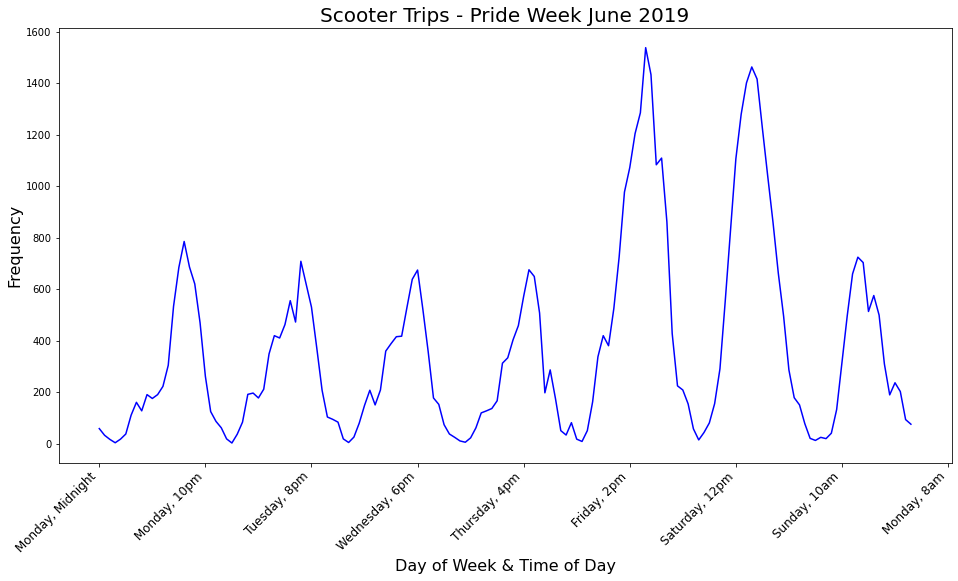

In [117]:
fig, ax = plt.subplots(figsize=(16, 8))
ax = hour_day_of_week['Trip_ID'].plot(kind='line', color='b')
ax.set_xlabel('Day of Week & Time of Day', fontsize=16)
ax.set_ylabel('Frequency', fontsize=16)
ax.set_title('Scooter Trips - Pride Week June 2019', fontsize=20)
ax.set_xticklabels(labels=['Sunday, 10pm', 'Monday, Midnight', 'Monday, 10pm', 'Tuesday, 8pm', 'Wednesday, 6pm', 
                           'Thursday, 4pm', 'Friday, 2pm', 'Saturday, 12pm', 'Sunday, 10am', 'Monday, 8am',
                           'Tuesday, 6am'],
                           rotation=45, fontsize=12, ha='right');

# ax.tick_params(axis='x', which='minor', length=7, width=1)
# ax.tick_params(axis='x', which='major', length=10, width=1, labelsize='medium')
# ax.xaxis.set_major_locator(MaxNLocator(15))
# ax.xaxis.set_minor_locator(MultipleLocator(10));
    

In [7]:
def image_file(file):
    return plt.savefig(file, transparent=False, bbox_inches='tight', format='svg', dpi=1200)


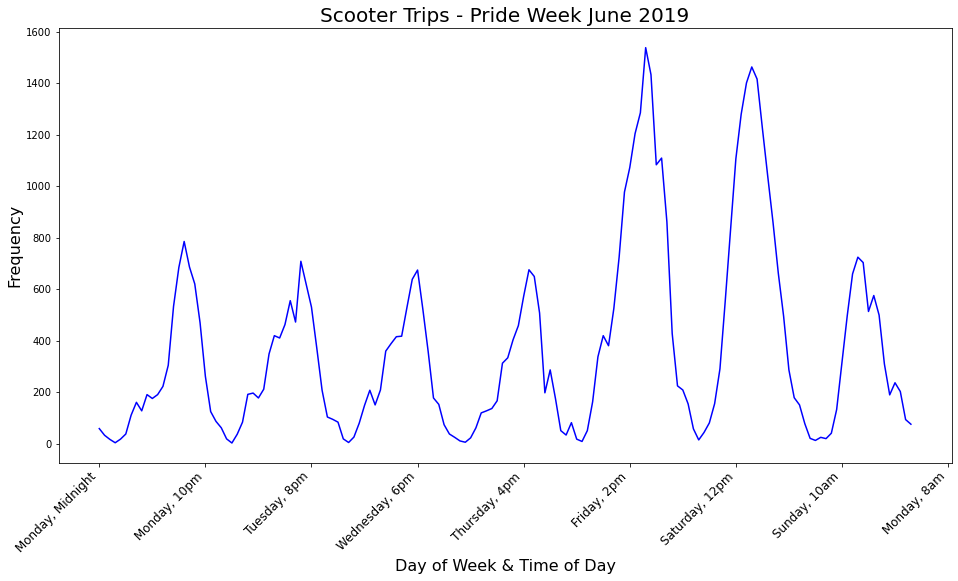

In [128]:
hour_day_of_week = scooter_june_pride.groupby(['Day_of_Week', 'Time_of_Day']).count()
fig, ax = plt.subplots(figsize=(16, 8))
ax = hour_day_of_week['Trip_ID'].plot(kind='line', color='b')
ax.set_xlabel('Day of Week & Time of Day', fontsize=16)
ax.set_ylabel('Frequency', fontsize=16)
ax.set_title('Scooter Trips - Pride Week June 2019', fontsize=20)
ax.set_xticklabels(labels=['Sunday, 10pm', 'Monday, Midnight', 'Monday, 10pm', 'Tuesday, 8pm', 
                'Wednesday, 6pm', 'Thursday, 4pm', 'Friday, 2pm', 'Saturday, 12pm', 
                'Sunday, 10am', 'Monday, 8am','Tuesday, 6am'],rotation=45, fontsize=12, ha='right')
image_file('../images/day_hour_line_plot.svg')

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import folium 
from folium.plugins import HeatMap

In [5]:
def histogram_of_column(df, col, ax, color, title, x_label, x_tick_loc, y_tick_loc, x_low, x_high):
    df[col].hist(color=color, grid=False, bins=30)
    ax.set_title(title, fontsize=20)
    ax.set_xlabel(x_label, fontsize=16)
    ax.set_ylabel('Frequency', fontsize=16)
    ax.tick_params(axis='x', which='minor', length=7, width=1)
    ax.tick_params(axis='x', which='major', length=10, width=1, labelsize='medium')
    ax.tick_params(axis='y', which='minor', length=5, width=1)
    ax.tick_params(axis='y', which='major', length=7, width=1, labelsize='medium')
    ax.xaxis.set_minor_locator(MultipleLocator(x_tick_loc))
    ax.yaxis.set_minor_locator(MultipleLocator(y_tick_loc))   
    ax.set_xlim(x_low, x_high)

def bar_chart(df, col, ax, color, label_lst, title, x_label):
    series = df[col].value_counts().sort_index()

    series.plot(kind='bar', color=color)
    ax.set_title(title, fontsize=20)
    ax.set_xlabel(x_label, fontsize=16)
    ax.set_ylabel('Frequency', fontsize=16)
    if label_lst == None:
        plt.xticks(rotation=45, fontsize=12)
    else:
        ax.set_xticklabels(labels=label_lst, rotation=45, fontsize=12)

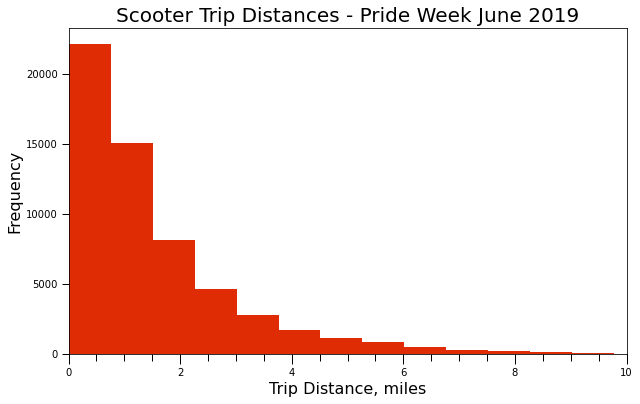

In [24]:
fig, ax = plt.subplots(figsize=(10,6))
histogram_of_column(scooter_june_pride, 'Trip_Distance', ax, '#DF2C04',
                    'Scooter Trip Distances - Pride Week June 2019', 
                    'Trip Distance, miles', 0.5, 5000, 0, 10)
image_file('../images/trip_distance_hist.svg')

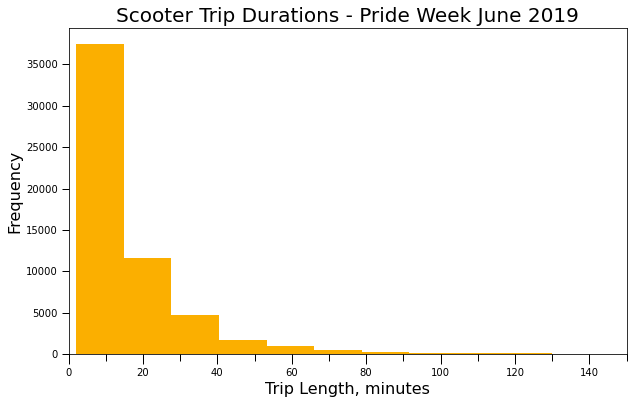

In [23]:
fig, ax = plt.subplots(figsize=(10,6))
histogram_of_column(scooter_june_pride, 'Trip_Duration', ax, '#FBAF00',
                    'Scooter Trip Durations - Pride Week June 2019', 
                    'Trip Length, minutes', 10, 5000, 0, 150 )
image_file('../images/trip_duration_hist.svg')


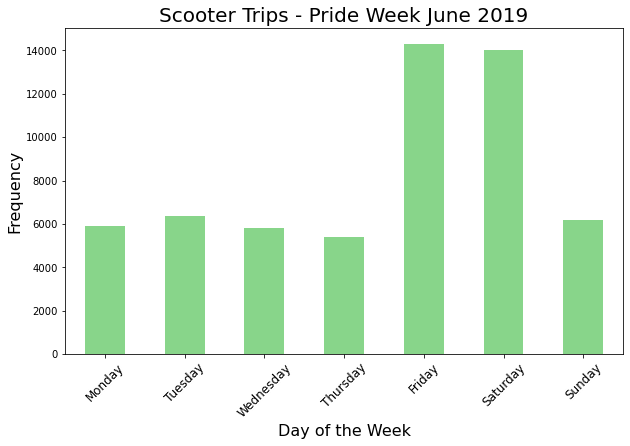

In [20]:
weekdays=['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday', 'Sunday']
fig, ax = plt.subplots(figsize=(10,6))
bar_chart(scooter_june_pride, 'Day_of_Week', ax, '#88D58A', weekdays, 
            'Scooter Trips - Pride Week June 2019', 'Day of the Week')
image_file('../images/day_of_week_bar.svg')

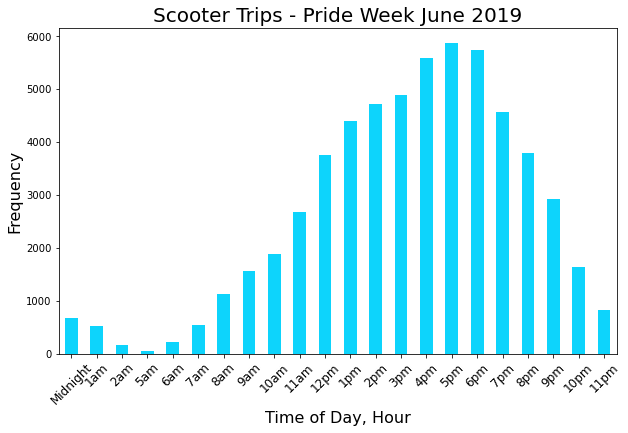

In [28]:
hours=['Midnight', '1am', '2am','5am', '6am', '7am', '8am', '9am', '10am', '11am', '12pm',
        '1pm', '2pm', '3pm', '4pm', '5pm', '6pm', '7pm', '8pm', '9pm', '10pm', '11pm',]
fig, ax = plt.subplots(figsize=(10,6))
bar_chart(scooter_june_pride, 'Time_of_Day', ax, '#0DD4FC', hours,
            'Scooter Trips - Pride Week June 2019', 'Time of Day, Hour')
image_file('../images/hour_of_day_bar1.svg')


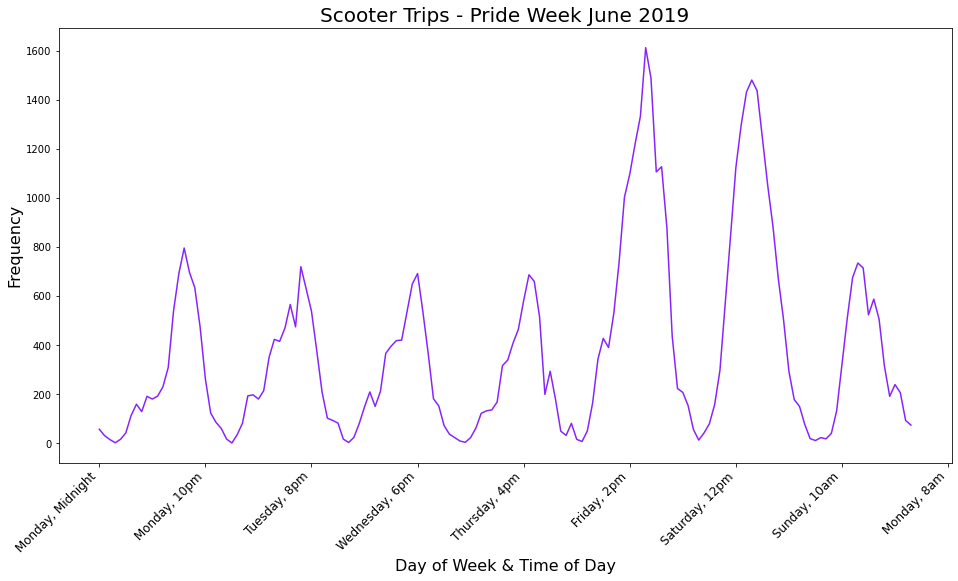

In [32]:
hour_day_of_week = scooter_june_pride.groupby(['Day_of_Week', 'Time_of_Day']).count()
fig, ax = plt.subplots(figsize=(16, 8))
ax = hour_day_of_week['Trip_ID'].plot(kind='line', color='#8624FC')
ax.set_xlabel('Day of Week & Time of Day', fontsize=16)
ax.set_ylabel('Frequency', fontsize=16)
ax.set_title('Scooter Trips - Pride Week June 2019', fontsize=20)
ax.set_xticklabels(labels=['Sunday, 10pm', 'Monday, Midnight', 'Monday, 10pm', 'Tuesday, 8pm', 
                'Wednesday, 6pm', 'Thursday, 4pm', 'Friday, 2pm', 'Saturday, 12pm', 
                'Sunday, 10am', 'Monday, 8am','Tuesday, 6am'],rotation=45, fontsize=12, ha='right')
image_file('../images/day_hour_line_plot.svg')

In [29]:
def annot_max(x,y, ax):
    xmax = x[np.argmax(y)]
    ymax = y.max()
    text= "{}".format(xmax)
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.94,0.96), **kw)


In [38]:
mon = scooter_june_pride[scooter_june_pride.Day_of_Week == 0].groupby('Time_of_Day').count()
mon

Trip_ID  Start_Time  End_Time  Trip_Distance  Trip_Duration  \
Time_of_Day                                                                
0                 58          58        58             58             58   
1                 32          32        32             32             32   
2                 16          16        16             16             16   
5                  3           3         3              3              3   
6                 17          17        17             17             17   
7                 43          43        43             43             43   
8                114         114       114            114            114   
9                160         160       160            160            160   
10               130         130       130            130            130   
11               192         192       192            192            192   
12               181         181       181            181            181   
13               193         193       193            193            193   
14               231         231       231            231            231   
15               310         310       310            310            310   
16               540         540       540            540            540   
17               692         692       692            692            692   
18               796         796       796            796            796   
19               697         697       697            697            697   
20               635         635       635            635            635   
21               476         476       476            476            476   
22               263         263       263            263            263   
23               124         124       124            124            124   

             Accuracy  Start_Centroid_Latitude  Start_Centroid_Longitude  \
Time_of_Day                                                                
0                  58                       58                        58   
1                  32                       32                        32   
2                  16                       16                        16   
5                   3                        3                         3   
6                  17                       17                        17   
7                  43                       43                        43   
8                 114                      114                       114   
9                 160                      160                       160   
10                130                      130                       130   
11                192                      192                       192   
12                181                      181                       181   
13                193                      193                       193   
14                231                      231                       231   
15                310                      310                       310   
16                540                      540                       540   
17                692                      692                       692   
18                796                      796                       796   
19                697                      697                       697   
20                635                      635                       635   
21                476                      476                       476   
22                263                      263                       263   
23                124                      124                       124   

             End_Centroid_Latitude  End_Centroid_Longitude  Day_of_Week  
Time_of_Day                                                              
0                               58                      58           58  
1                               32                      32           32  
2                               16                      16         

In [ ]:
hour_day_of_week = scooter_june_pride.groupby(['Day_of_Week', 'Time_of_Day']).count()
fig, ax = plt.subplots(figsize=(16, 8))
ax = hour_day_of_week['Trip_ID'].plot(kind='line', color='#8624FC')
ax.set_xlabel('Day of Week & Time of Day', fontsize=16)
ax.set_ylabel('Frequency', fontsize=16)
ax.set_title('Scooter Trips - Pride Week June 2019', fontsize=20)
ax.set_xticklabels(labels=['Sunday, 10pm', 'Monday, Midnight', 'Monday, 10pm', 'Tuesday, 8pm', 
                'Wednesday, 6pm', 'Thursday, 4pm', 'Friday, 2pm', 'Saturday, 12pm', 
                'Sunday, 10am', 'Monday, 8am','Tuesday, 6am'],rotation=45, fontsize=12, ha='right')
# image_file('../images/day_hour_line_plot.svg')